In [1]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv'
# R^2 = 0.75  Percentage of the Price explained by the indep. variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X\beta + e $$

In [2]:
data = pd.read_csv('houseSmallData.csv')
train = data.iloc[0:100,:]
train.shape


(100, 82)

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

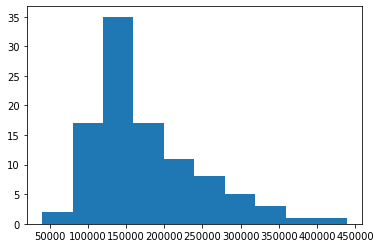

In [3]:
salePrice = train['SalePrice']
salePrice.describe()
plt.hist(salePrice)

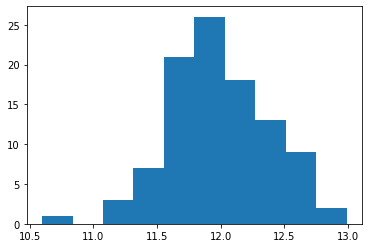

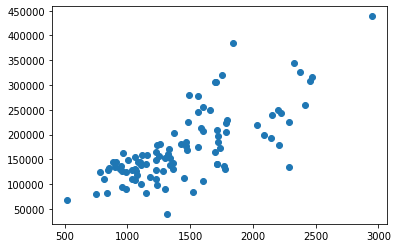

In [5]:
plt.scatter(train['GrLivArea'],y=train['SalePrice'])

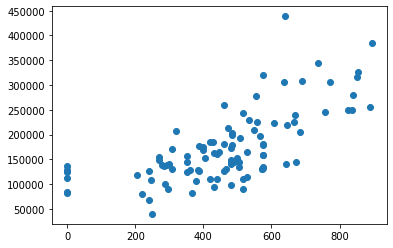

In [6]:
plt.scatter(train['GarageArea'],y=train['SalePrice'])

In [7]:
nulls = train.isnull().sum().sort_values(ascending=False)[0:20]
type(nulls)
data = train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(data.isnull().sum() != 0)
data.shape

(100, 39)

In [12]:
numeric = data.select_dtypes(include=[np.number])
numeric.head()
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[:3].index
cols




Index(['SalePrice', 'OverallQual', 'GrLivArea'], dtype='object')

In [13]:
X = data[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea
0,7,1710
1,6,1262
2,7,1786
3,7,1717
4,8,2198
...,...,...
95,6,1470
96,7,1588
97,4,960
98,5,835


In [14]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

R^2 is: 0.7776370735872411


(array([ 5.,  2.,  7., 14., 31., 20., 12.,  6.,  2.,  1.]),
 array([-90155.04211637, -71166.51961477, -52177.99711316, -33189.47461156,
        -14200.95210996,   4787.57039164,  23776.09289324,  42764.61539484,
         61753.13789644,  80741.66039804,  99730.18289964]),
 <BarContainer object of 10 artists>)

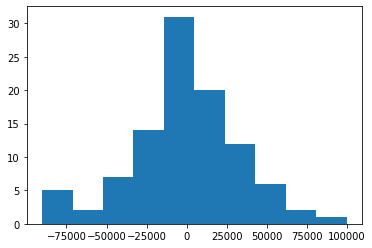

In [15]:
plt.hist(Y - predictions)

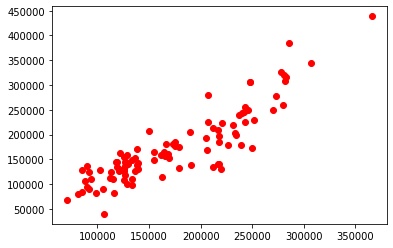

In [16]:
plt.scatter(predictions, Y, color = 'r')

In [17]:
train[['SalePrice', 'OverallQual', 'MasVnrArea']]

,SalePrice,OverallQual,MasVnrArea
0,208500,7,196.0
1,181500,6,0.0
2,223500,7,162.0
3,140000,7,0.0
4,250000,8,350.0
...,...,...,...
95,185000,6,68.0
96,214000,7,183.0
97,94750,4,48.0
98,83000,5,0.0


In [19]:
test = pd.read_csv('testData.csv')
test.shape
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [20]:
X = test[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X


,OverallQual,GrLivArea
0,6,1610
1,6,1732
2,5,1535
3,7,1226
4,7,1818
...,...,...
95,6,1456
96,7,1726
97,8,3112
98,6,2229


In [25]:
import sklearn as sklearn
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")
sklearn.metrics.mean_squared_error(predictions, Y)
predictions

R^2 is: 0.6927421490147458


array([181628.33396303, 187089.54258367, 147185.62226246, 195524.36732857,
       222024.6583402 , 260899.00654441,  94255.37646087, 113791.67446739,
       146379.87017089, 192103.11115344, 192595.5152094 , 204656.22436636,
       261327.45480679, 210680.17326464, 213410.77757496, 174824.20518977,
       127355.16800882, 128832.3801767 , 284873.32148267, 174734.6771796 ,
       153785.12279878,  97657.4408475 , 157903.4112668 , 163230.32787218,
       180553.99784094, 143310.34560837, 152442.20264616, 116074.63872684,
       169900.16463018, 125609.37181042, 237199.65606477, 201503.55222176,
       137874.70920432, 229743.2590037 , 155511.72720868, 215936.75364834,
       132816.37662946, 228336.3830575 , 254632.0458322 , 188521.99074646,
        86063.56352991, 218264.48191288, 140471.02149938, 207834.46872755,
       155825.0752443 , 186059.97046667, 117641.37890489, 231738.44744413,
       188988.82258583, 138635.6972908 , 121849.19538309, 248275.55710981,
       198772.94791144, 1